# PixelCNN

As explained at the end of the Naïve Face Generation notebook, to effectively generate images we need to sample each pixels given te surrounding one. This notebook presents an early approach to construct a model able to do that called **PixelCNN**. 

To formalize mathematically the problem, $p(x)$ represent the pixels distribution of an images. Which is equivalent to the joint probability of each pixels $p(x_1, x_2, ..., x_n)$. Modelizing the whole joint probability is too expensive, thus we made the hypothesis that $p(x_i) = p(x_i | x_{i-1})p(x_{i-1})$. Meaning that te probability of the pixel $x_i$ only depends on the previous pixel.

This simplification makes it easier to compute the whole probability of an images that could be rewritte like that given our assumption :
$p(x_n | x_{n-1})...p(x_2 | x_1)p(x_1)$

PixelCNN will learn the parameter of those distribution based on example. In this notebook we are going to generate numbers from the **mnist** dataset. First part of the code will focus on the loading and pre-processing of the dataset.

The dataset chose is the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. It consists of 28x28 images of handwritten digits. We preprocess the image to make them binary. Meaning that the background of the image have a value of 0 and the foreground of the image have a value of 1 without gray scale. This preprocessing will help the model to generate better numbers.

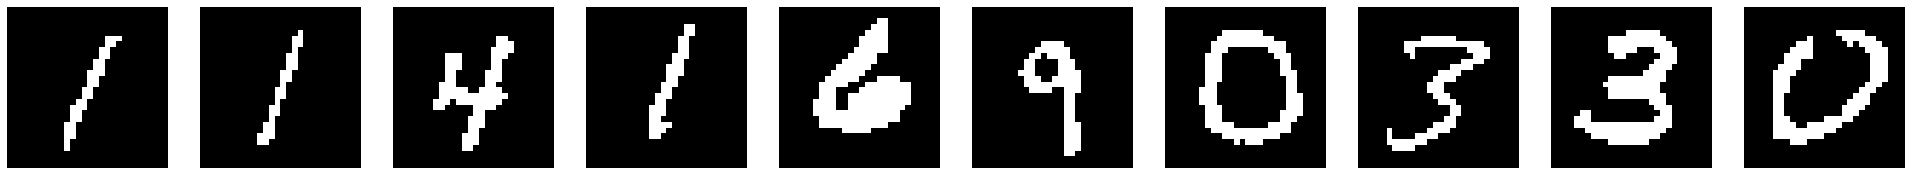

In [1]:
from utils.mnist import *

mnist_path = "./ressources/mnist"

X, y = load_mnist(mnist_path, binary_images=True)

plot_images(X[:10])

## Pixel CNN

Our first Generator Network leverage the successful Convolutional Neural Network architecture. However, classic CNN are able to look at a pixel and all the surrounding pixels. As we are trying to generate the next pixel based on the previous one, the Convolutionnal Layer should be constrained to only look at the previous pixel. 

The next cell shows the implementation of such a CNN layer.